L’objectif de ce travail est d’étudier une banque de données sur la consommation des voitures disponible sur le dépot de l’UCI (https://archive.ic
s.uci.edu/ml/datasets/Auto+MPG).


# 1- Analyse des données

## 1-1 Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1-2 Charger l’ensemble de données

In [4]:
df = pd.read_csv('auto-mpg.csv', header=None)

In [5]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car_name']
df = pd.read_csv('auto-mpg.csv', header=None, names=column_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# Arranger les colonnes
colonnes=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car_name','mpg']
df=df[colonnes]
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


## 1-3 Analyse de données

In [7]:
# Le nombre de lignes et de colonnes dans le DataFrame
print("Dimensions du DataFrame : ", df.shape)

Dimensions du DataFrame :  (398, 9)


In [8]:
# informations sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [9]:
# Résumé statistique des colonnes numériques
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [10]:
# Afficher des valeurs manquantes par colonne
valeurs_manquantes = df.isna().sum()
print("Nombre de valeurs manquantes par colonne :")
print(valeurs_manquantes)

Nombre de valeurs manquantes par colonne :
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
mpg             0
dtype: int64


In [11]:
# Filtrer les lignes avec des valeurs manquantes
lignes_manquantes = df[df.isnull().any(axis=1)]

# Afficher les lignes avec des valeurs manquantes
lignes_manquantes

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg
32,4,98.0,NaN,2046.0,19.0,71,1,ford pinto,25.0
126,6,200.0,NaN,2875.0,17.0,74,1,ford maverick,21.0
330,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe,40.9
336,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra,23.6
354,4,100.0,NaN,2320.0,15.8,81,2,renault 18i,34.5
374,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl,23.0


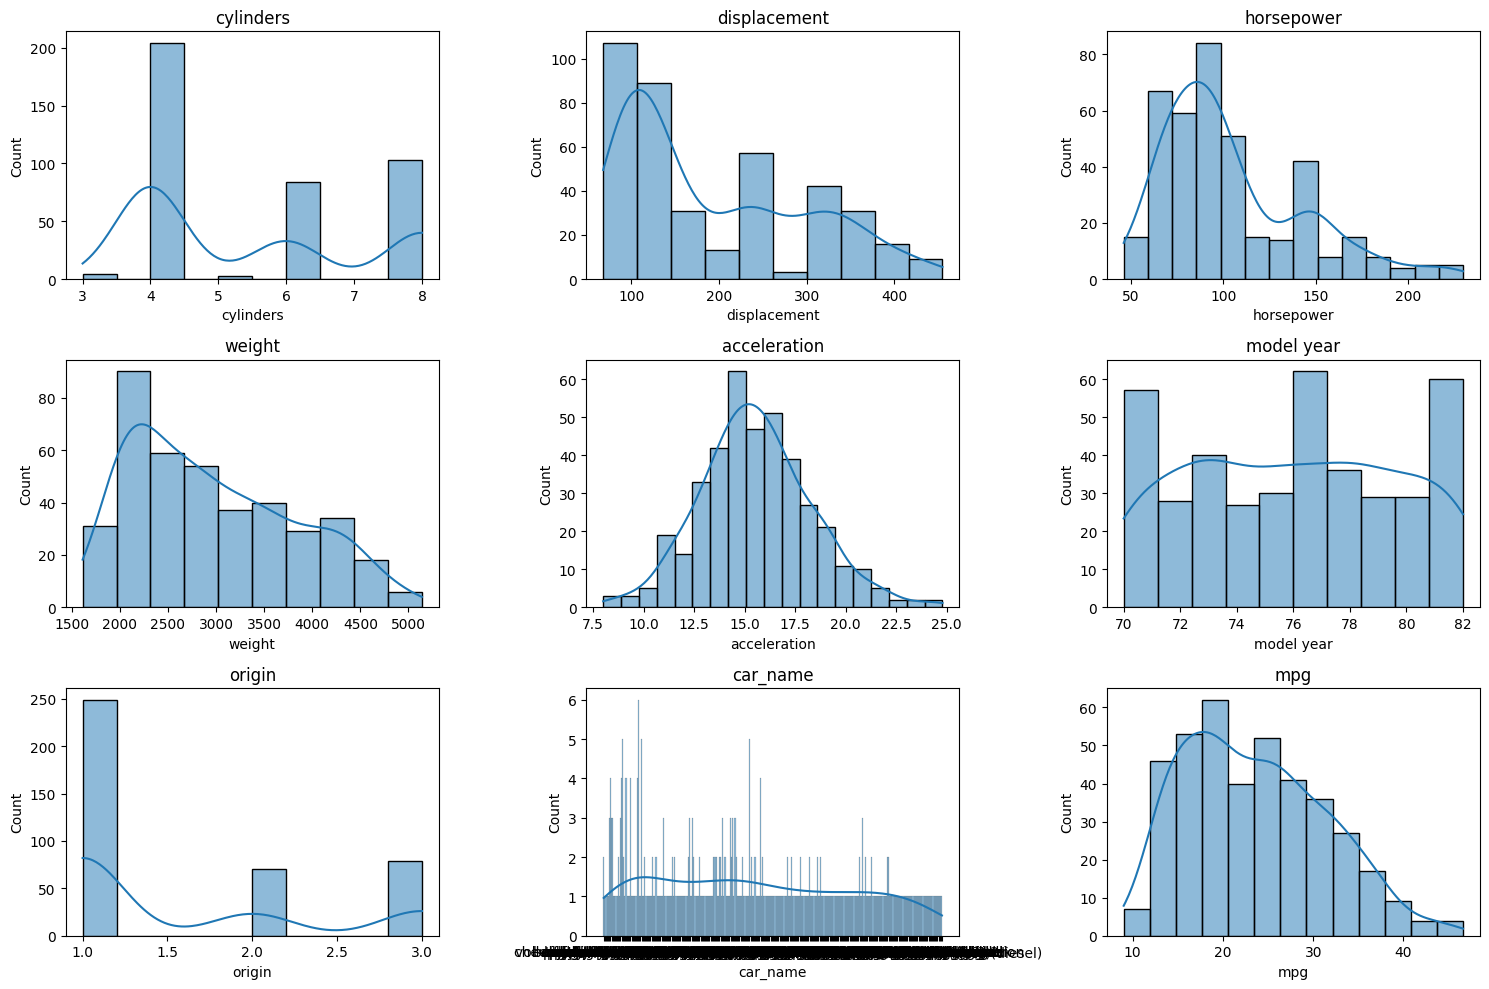

In [12]:
# Histogrammes pour visualiser la distribution de chaque variable dans le dataframe

n = len(df.columns)
nc = 3
num_rows = (n + nc - 1) // nc

# Créer une figure et des sous-plots
fig, axes = plt.subplots(num_rows, nc, figsize=(15, 10))

# Parcourir les colonnes et créer des histogrammes
for i, col in enumerate(df.columns):
    ax = axes.flat[i]
    sns.histplot(df[col].dropna(), ax=ax, kde=True)
    ax.set_title(col)

# Gestion de l'affichage des sous-plots
if n % nc != 0:
    for i in range(n, num_rows*nc):
        fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

<Axes: >

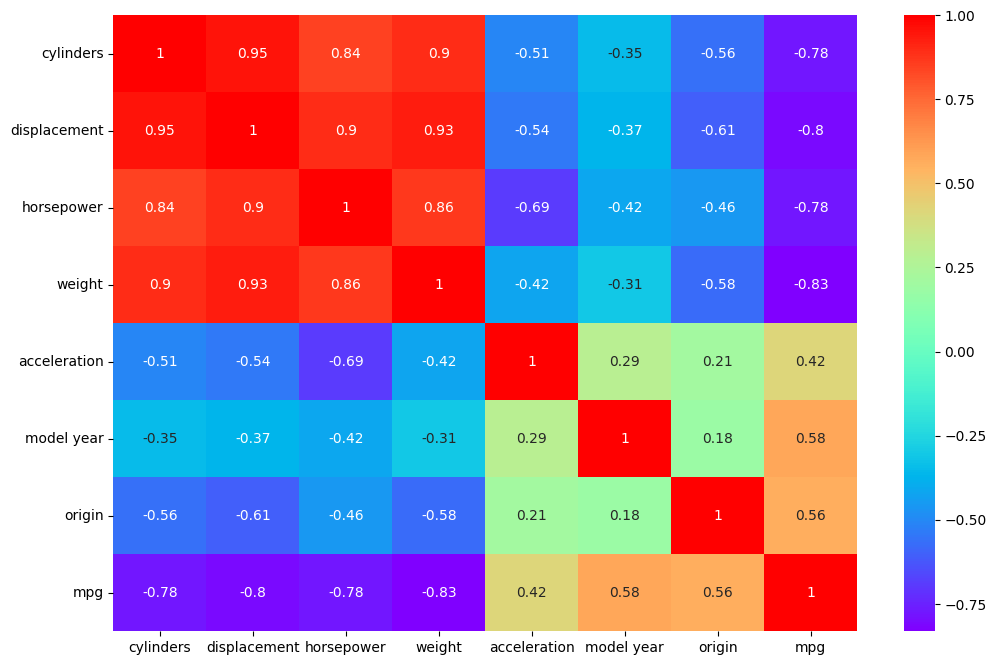

In [15]:
#calculer la corrélation entre les différentes colonnes d'un dataframe
df_heatmap=df.drop(columns=['car_name'])
plt.figure(figsize=(12,8))
sns.heatmap(df_heatmap.corr(),annot=True,cmap="rainbow")

###### Une corrélation forte a été observée entre les variables "cylinders", "displacement", "horsepower", et "weight". Cette corrélation dépasse 0.84, ce qui indique une relation significative entre ces facteurs

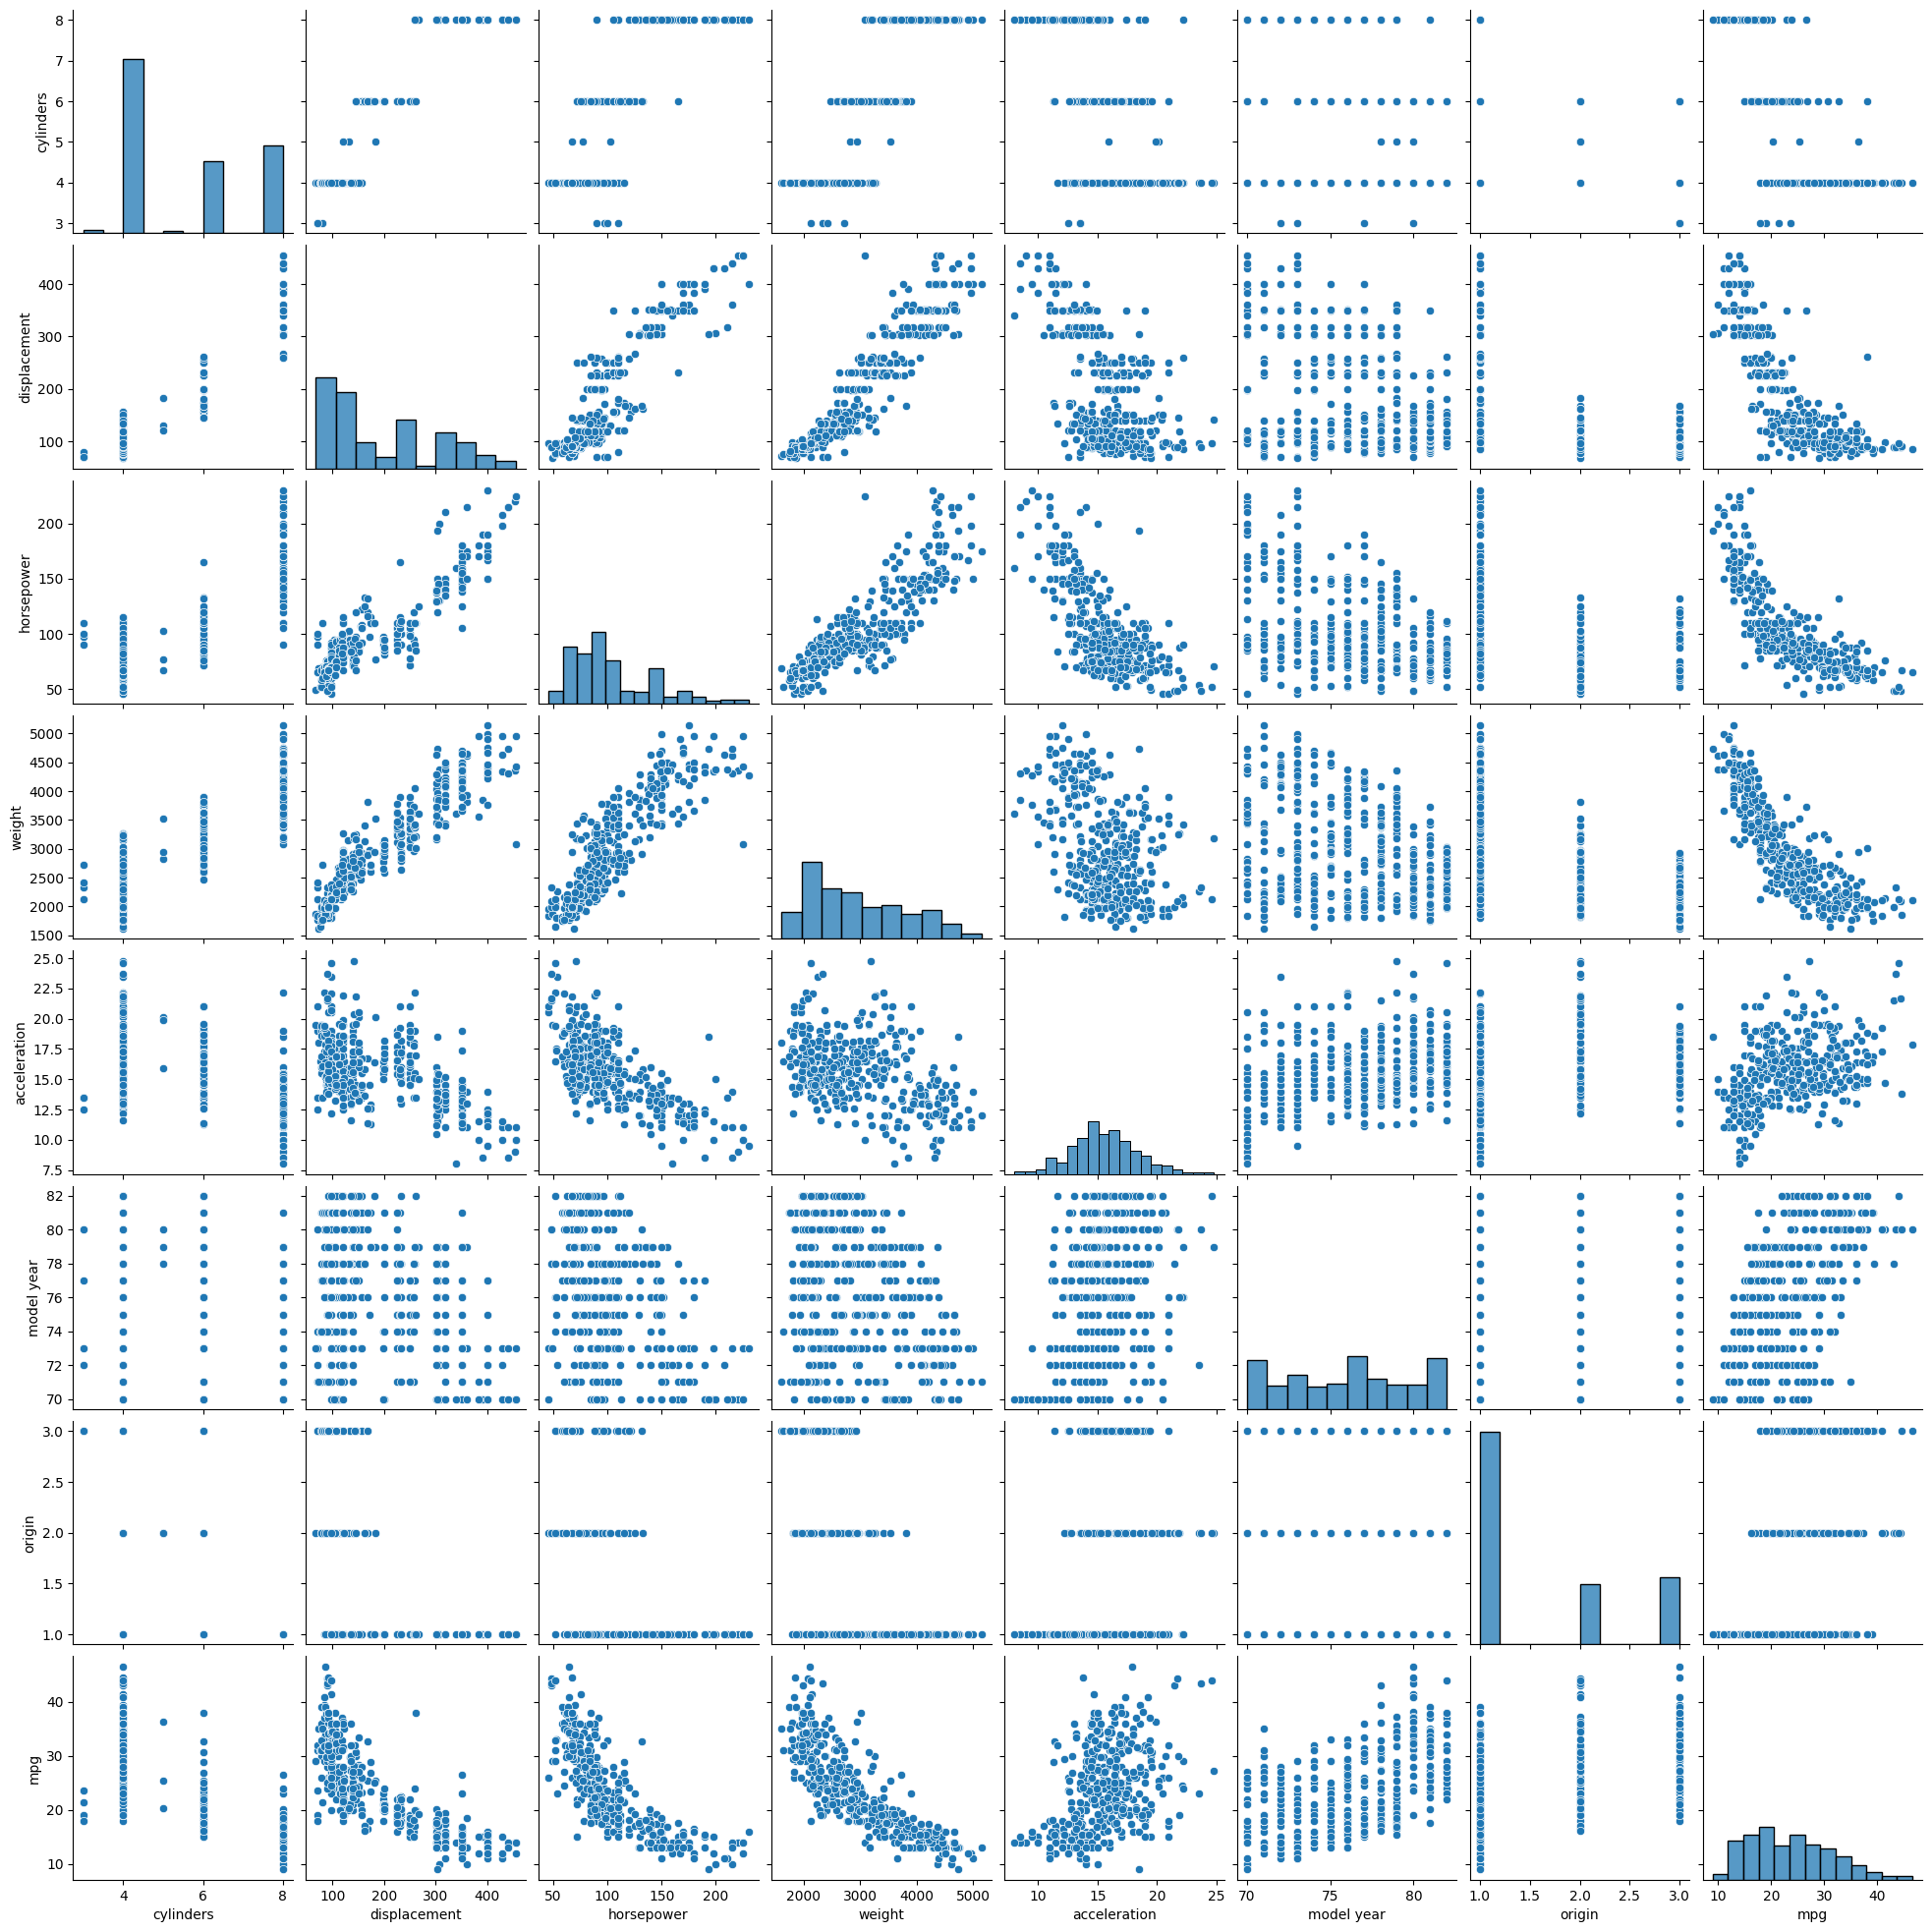

In [16]:
#Aperçu visuel de la relation entre chaque paire de variables.

sns.pairplot(df)

In [17]:
df=df.copy()
df['origin']=df.origin.map({1: 'US', 2: 'Asian',3:'European'})
df['origin'].value_counts(normalize=True)

,proportion
origin,
US,0.625628
European,0.198492
Asian,0.175879


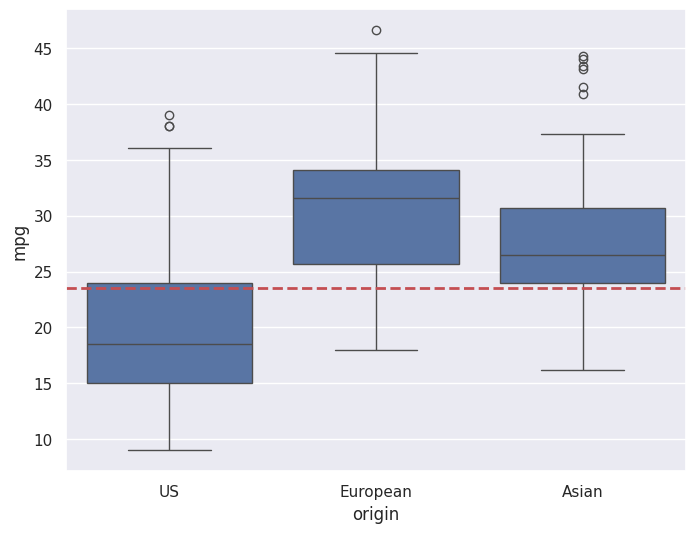

In [18]:
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='origin', y="mpg", data=df)
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()

##### À partir de cette boîte à moustaches, nous pouvons facilement voir que les voitures fabriquées aux États-Unis sont les moins efficaces en termes de mpg et qu'elles sont presque inférieures à la moyenne mondiale

# 2- Régression

## 2-1 Préparer les données pour prédire la variable mpg

In [19]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,US,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,US,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,US,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,US,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,US,ford torino,17.0


In [20]:
# Afficher des valeurs manquantes par colonne
valeurs_manquantes = df.isna().sum()
print("Nombre de valeurs manquantes par colonne :")
print(valeurs_manquantes)

Nombre de valeurs manquantes par colonne :
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
mpg             0
dtype: int64


##### Étant donné le faible nombre de valeurs manquantes pour la variable 'horsepower' (seulement 6 sur un total de 398 exemples), nous envisageons de remplacer ces valeurs manquantes par la moyenne de la colonne 'horsepower'

In [21]:
# Remplacer les valeurs manquantes de 'horsepower' par la moyenne
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

<ipython-input-21-d8163419458a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [23]:
pip install graphviz

In [24]:
pip install pydotplus


In [25]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Afficher les colonnes avec leurs valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)


Nombre de valeurs manquantes par colonne :
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
mpg             0
dtype: int64


###### Nous devons convertir les valeurs des colonnes 'car_name' et 'origin' en valeurs numériques à l'aide de la classe LabelEncoder de la bibliothèque scikit-learn, et remplacer les colonnes d'origine par ces nouvelles colonnes encodées 'car_name_encoded' et 'origin_encoded'

In [26]:
from sklearn.preprocessing import LabelEncoder  # Ajout de l'import
label_encoder = LabelEncoder()
df['car_name_encoded'] = label_encoder.fit_transform(df['car_name'])

# Supprimer la colonne 'car_name'
df.drop('car_name', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Encoder la variable 'origin'
df['origin_encoded'] = label_encoder.fit_transform(df['origin'])

# Supprimer la colonne d'origine si nécessaire
df.drop('origin', axis=1, inplace=True)


## 2-2 Arbre de régression de type CART

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df_label=df
# X contient les caractéristiques
#y contient la variable cible 'mpg'
X = df_label.drop(['mpg'], axis=1)
y = df_label['mpg']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser l'arbre de régression CART
arbre_reg = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entraîner l'arbre de régression sur les données d'entraînement
arbre_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = arbre_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)


Mean Squared Error (MSE) : 13.830619348218551


In [29]:
#!pip install pydotplus

## 2-3 Visualiser l’arbre

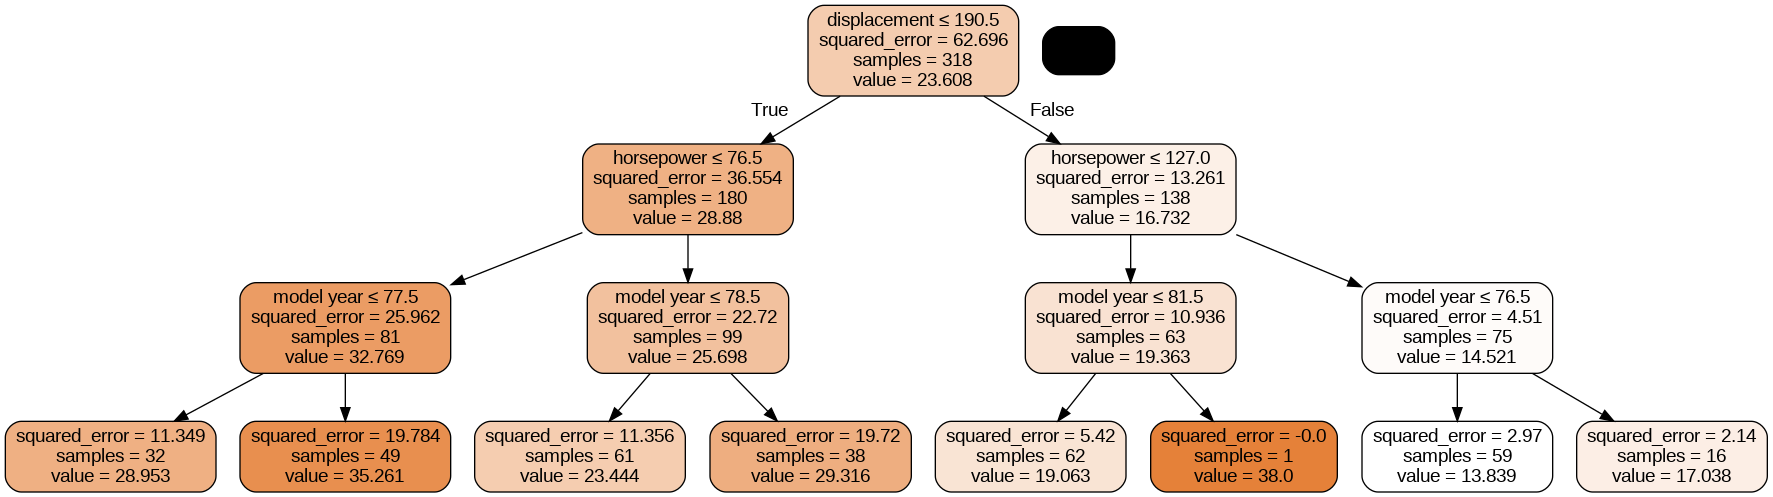

In [30]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Exporter l'arbre de régression en format dot
dot_data = export_graphviz(arbre_reg, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Créer le graphique
graph = pydotplus.graph_from_dot_data(dot_data)

# Afficher l'arbre dans le notebook
Image(graph.create_png())


## 2-4  Importance des variables

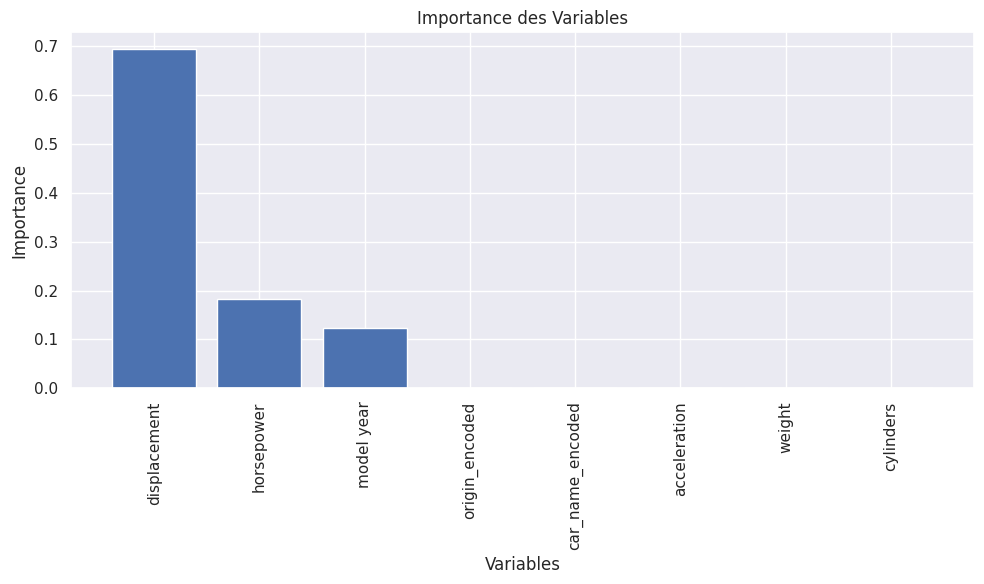

In [31]:
# Obtenez l'importance des variables
importances = arbre_reg.feature_importances_

# Trier les indices des variables par ordre décroissant d'importance
indices = np.argsort(importances)[::-1]

# Noms des variables
feature_names = X.columns

# Afficher l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [32]:
importances = arbre_reg.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("Importance des variables pour l'arbre de régression (par ordre décroissant):")
print(importances_df)

Importance des variables pour l'arbre de régression (par ordre décroissant):
            Feature  Importance
1      displacement    0.693720
2        horsepower    0.182362
5        model year    0.123919
0         cylinders    0.000000
3            weight    0.000000
4      acceleration    0.000000
6  car_name_encoded    0.000000
7    origin_encoded    0.000000


##### les variables 'displacement', 'horsepower' et 'model year' ont les plus grandes importances dans la décision de l'arbre. Les variables 'cylinders', 'weight', 'acceleration', 'origin' et 'car_name_encoded' semblent avoir moins d'importance dans cet arbre

## 2-5 Mesures d’erreurs

In [33]:
# Valeur des mesure d'erreur
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction sur les données d'entraînement pour calculer les métriques
y_pred = arbre_reg.predict(X)

# Calcul des métriques
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Affichage des métriques
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE) :", mae)
print("R² (Coefficient de détermination) :", r2)


Mean Squared Error (MSE) : 11.122183659320527
Mean Absolute Error (MAE) : 2.520271439404241
R² (Coefficient de détermination) : 0.8174779787599485


## 2-6  Foret aléatoire

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Création du modèle RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Nous avons créé et entraîné un modèle de régression de forêt aléatoire (RandomForestRegressor) avec 100 arbres pour prédire la consommation de carburant ('mpg') en fonction des caractéristiques d'entraînement.

### Importance des variables

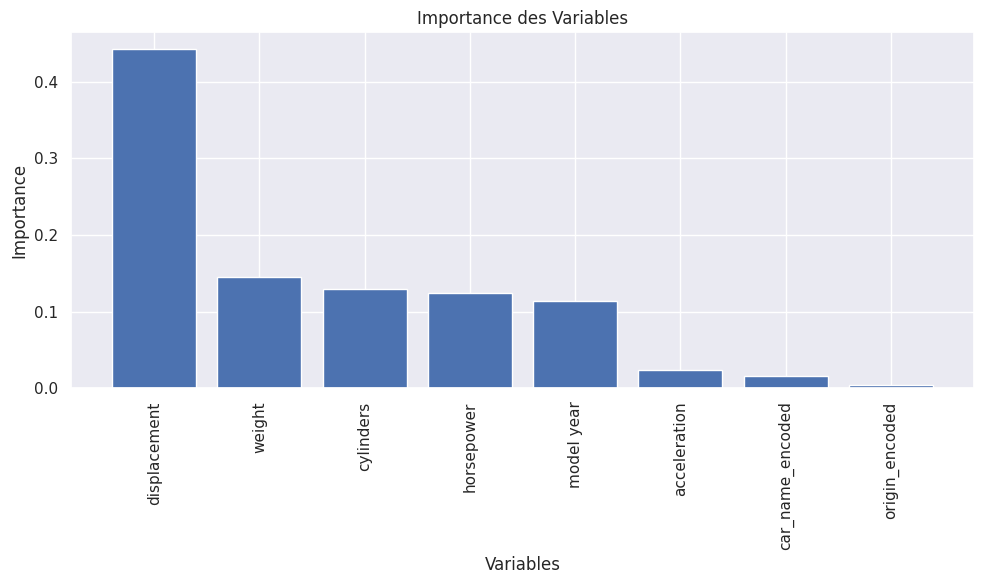

In [35]:
importances = forest_reg.feature_importances_

# Trier les indices des variables par ordre décroissant d'importance
indices = np.argsort(importances)[::-1]

feature_names = X.columns

# Afficher l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

# Prédictions sur les données de test
y_pred = forest_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcul du coefficient de détermination (R2)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 4.7155093999999975
Mean Absolute Error: 1.6366749999999997
R2 Score: 0.912296423733623


In [37]:
# Ajustement des hyperparamètres de la forêt aléatoire en utilisant RandomizedSearchCV

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

# Création du modèle RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

# Définir les distributions de paramètres à échantillonner
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(5, 20).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Création de l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest_reg, param_distributions=param_dist, n_iter=50,
                                   cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Entraînement du modèle avec la recherche aléatoire
random_search.fit(X_train, y_train)

# Obtention du meilleur modèle
best_model = random_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)

#Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) :", mae)

# Calcul du coefficient de détermination (R²) sur l'ensemble de test
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R²) :", r2)
# Obtention des meilleurs paramètres
best_params = random_search.best_params_
print("Meilleurs paramètres :", best_params)


Mean Squared Error (MSE) : 4.088661495603279
Mean Absolute Error (MAE) : 1.5431806966326964
Coefficient de détermination (R²) : 0.9239551435721787
Meilleurs paramètres : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 319}


### Comparaison entre la forêt Aléatoire et l'arbre de régression

# 3- Clustering

On souhaite appliquer une méthode de clustering sur les données de consommation des voitures. Afin de choisir la méthode de clustering et ses paramètres, on observera dans un premier temps les données dans un espace à 2D en appliquant une ACP puis le résultat de ce clustering dans l’espace 2D.

## 3-1 Préparation des données

In [49]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car_name']
df = pd.read_csv('auto-mpg.csv', header=None, names=column_names)
colonnes=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car_name','mpg']
df=df[colonnes]

In [50]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [51]:
# Remplacer les valeurs manquantes par la moyenne
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

<ipython-input-51-c9a46ce4a75d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = df

# Suppression de la colonne "car_name"
data = data.drop("car_name", axis=1)

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [53]:
X = df.drop(columns=['car_name'])

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer un nouveau DataFrame avec les données standardisées
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

##  3-2  Projection des données dans un espace 2D avec une Analyse en composantes principales

        PC1       PC2
0  2.741873 -0.957048
1  3.568221 -1.064621
2  3.059922 -1.173319
3  3.005253 -1.054191
4  2.994347 -1.246306
Pourcentage de variance expliquée par chaque composante :
[0.67004303 0.11782142]


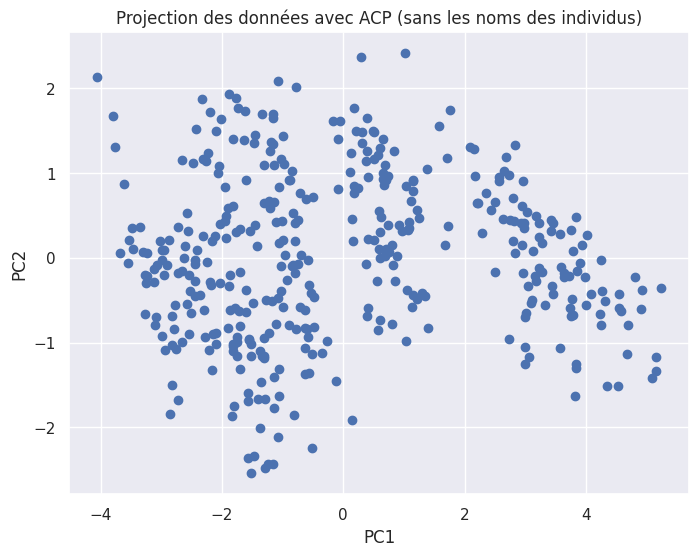

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # Nous voulons 2 composantes principales pour la projection 2D
X_pca = pca.fit_transform(df_scaled)

# Créer un DataFrame pour les données projetées
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Afficher les premières lignes du DataFrame pour vérification
print(df_pca.head())

# Afficher le pourcentage de variance expliquée par chaque composante
print("Pourcentage de variance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)

# Visualisation de la projection 2D sans les noms des individus
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Projection des données avec ACP (sans les noms des individus)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


##### On observe ici la présence de 3 clusters dans les données. Cela peut nous conduire à choisir l'algorithme K-means avec 3 clusters.

## 3-2  Application de la méthode K-means

        PC1       PC2  cluster
0  2.741873 -0.957048        1
1  3.568221 -1.064621        1
2  3.059922 -1.173319        1
3  3.005253 -1.054191        1
4  2.994347 -1.246306        1


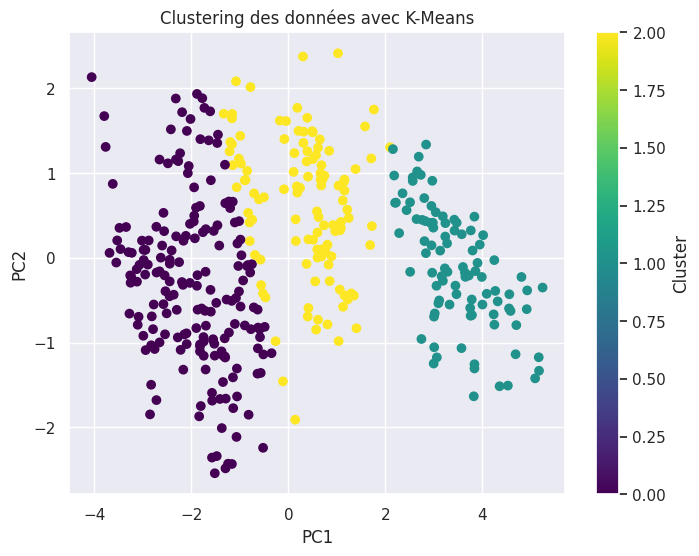

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Assurez-vous d'importer cette fonction


#Appliquons K-Means avec 3 clusters.
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_pca)

# Ajouter les étiquettes de cluster au DataFrame des données projetées
df_pca['cluster'] = kmeans.labels_

# Afficher les premières lignes du DataFrame avec les clusters
print(df_pca.head())

# Visualisation des clusters dans l'espace 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.title('Clustering des données avec K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

silhouette_avg_K_Means = silhouette_score(df_pca, kmeans.labels_)

## 3-3 Mesures d’erreurs

In [56]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score

print("Silhouette Score moyen   (K-Means) :", silhouette_avg_K_Means)

# Indice de Calinski-Harabasz
calinski_score = calinski_harabasz_score(df_scaled, kmeans.labels_)
print("Indice de Calinski-Harabasz (K-Means) :", calinski_score)

# Indice de Davies-Bouldin
davies_score = davies_bouldin_score(df_scaled, kmeans.labels_)
print("Indice de Davies-Bouldin (K-Means) :", davies_score)


Silhouette Score moyen   (K-Means) : 0.548488927954409
Indice de Calinski-Harabasz (K-Means) : 320.6809193519051
Indice de Davies-Bouldin (K-Means) : 1.1931726947257806
